In [15]:
#pip install plotly

In [14]:
#pip show plotly

### 1. Importing usfull liberaries

In [2]:
#Basic libraries
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
#pip show cufflinks

### 2. Reading the fake and true datasets

In [3]:
fake_news_data = pd.read_csv('E:/INSAID/Fake and real news dataset/Fake.csv')
fake_news_data


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
fake_news_data_copy = fake_news_data.copy()
true_news_data = pd.read_csv('E:/INSAID/Fake and real news dataset/True.csv')
true_news_data_copy = true_news_data.copy()
true_news_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
fake_news_data = fake_news_data_copy.copy()
true_news_data = true_news_data_copy.copy()

In [40]:
#fake_news_data.head()

### 3. Dataset Exploration

In [6]:
fake_news_data.info()
true_news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
fake_news_data.head()
fake_news_data.isna().mean()

title      0.0
text       0.0
subject    0.0
date       0.0
dtype: float64

In [8]:
true_news_data.head()
true_news_data.isna().mean()

title      0.0
text       0.0
subject    0.0
date       0.0
dtype: float64

- Both CSV dataset contains fake news and true news respectivelly and has nearly 23481  fake news and 21417 true news

### columns attributes in the .csv:

- title- contains news headlines
- text- contains news content/article
- subject- the type of news
- date- the date the news was published

### 4. Data Pre-processing and Cleaning Step
- Used for creating the target column
#### 4.1. create the target column for both fake and true news. 

- Assign target value as ‘0’ for fake news and ‘1’ for true news

In [9]:
fake_news_data['output']=0

In [10]:
true_news_data['output']=1

In [11]:
fake_news_data.head()


,title,text,subject,date,output
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [12]:
true_news_data.head()

,title,text,subject,date,output
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


#### 4.2.  Concatenate title and text of news
- used to classify based on the title and text content togather.

In [13]:

#Concatenating and dropping for fake news
fake_news_data['news']=fake_news_data['title']+fake_news_data['text']
fake_news_data=fake_news_data.drop(['title', 'text'], axis=1)


In [14]:
#Concatenating and dropping for true news
true_news_data['news']=true_news_data['title']+true_news_data['text']
true_news_data=true_news_data.drop(['title', 'text'], axis=1)

In [15]:
true_news_data.head()

,subject,date,output,news
0,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
1,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
2,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
4,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...


In [16]:
fake_news_data.head()


,subject,date,output,news
0,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Year’...
1,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian ...
2,News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke...
3,News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Dur...


In [17]:
#Rearranging the columns
fake_news_data = fake_news_data[['subject', 'date', 'news','output']]
true_news_data = true_news_data[['subject', 'date', 'news','output']]

In [18]:
true_news_data.head()

,subject,date,news,output
0,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...",1
1,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,1
2,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,1
4,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,1


In [56]:
fake_news_data.head()

,subject,date,news,output
0,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...,0
1,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...,0
2,News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...,0
3,News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...,0


### 5. convert datetime  to unique format

In [19]:
true_news_data['date'] = pd.to_datetime(true_news_data['date'])
fake_news_data['date'] = pd.to_datetime(fake_news_data['date'])

ParserError: Unknown string format: https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/

#### The result shows there is erigularity on dateformat

In [20]:
true_news_data['date'].value_counts()

2017-12-20    182
2017-12-06    166
2017-11-30    162
2017-11-09    158
2017-10-13    155
             ... 
2016-09-11      1
2016-05-14      1
2016-05-30      1
2016-08-06      1
2016-09-03      1
Name: date, Length: 716, dtype: int64

In [21]:
fake_news_data['date'].value_counts()

May 10, 2017                                                                                                                                             46
May 26, 2016                                                                                                                                             44
May 5, 2016                                                                                                                                              44
May 6, 2016                                                                                                                                              44
May 11, 2016                                                                                                                                             43
                                                                                                                                                         ..
October 9, 2017                                                 

#### We descover that the errigularity is in fake news dataset so:

In [22]:
fake_news_data=fake_news_data[~fake_news_data.date.str.contains("http")]
fake_news_data=fake_news_data[~fake_news_data.date.str.contains("HOST")]

In [23]:
true_news_data['date'] = pd.to_datetime(true_news_data['date'])
fake_news_data['date'] = pd.to_datetime(fake_news_data['date'])

#### Since Irregularities are fixed the appending two datasets for the next txt processing

In [24]:
mixed_data = [true_news_data, fake_news_data]
news_collection = pd.concat(mixed_data)
news_collection

,subject,date,news,output
0,politicsNews,2017-12-31,"As U.S. budget fight looms, Republicans flip t...",1
1,politicsNews,2017-12-29,U.S. military to accept transgender recruits o...,1
2,politicsNews,2017-12-31,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,politicsNews,2017-12-30,FBI Russia probe helped by Australian diplomat...,1
4,politicsNews,2017-12-29,Trump wants Postal Service to charge 'much mor...,1
...,...,...,...,...
23476,Middle-east,2016-01-16,McPain: John McCain Furious That Iran Treated ...,0
23477,Middle-east,2016-01-16,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,Middle-east,2016-01-15,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,Middle-east,2016-01-14,How to Blow $700 Million: Al Jazeera America F...,0


### 6. Text processing
- Removing the punctuations
- News-Stop words
- Special characters

In [25]:
news_collection_copy=news_collection.copy() # copy 


In [26]:
news_collection['news'] = news_collection['news'].str.lower()
news_collection

,subject,date,news,output
0,politicsNews,2017-12-31,"as u.s. budget fight looms, republicans flip t...",1
1,politicsNews,2017-12-29,u.s. military to accept transgender recruits o...,1
2,politicsNews,2017-12-31,senior u.s. republican senator: 'let mr. muell...,1
3,politicsNews,2017-12-30,fbi russia probe helped by australian diplomat...,1
4,politicsNews,2017-12-29,trump wants postal service to charge 'much mor...,1
...,...,...,...,...
23476,Middle-east,2016-01-16,mcpain: john mccain furious that iran treated ...,0
23477,Middle-east,2016-01-16,justice? yahoo settles e-mail privacy class-ac...,0
23478,Middle-east,2016-01-15,sunnistan: us and allied ‘safe zone’ plan to t...,0
23479,Middle-east,2016-01-14,how to blow $700 million: al jazeera america f...,0


In [76]:
#news_collection = re.sub('\[.*?\]', '', news_collection)

In [27]:
clean_news=news_collection.copy()

def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return textclean_news['news'] == clean_news['news'].apply(lambda x:review_cleaning(x))
clean_news



,subject,date,news,output
0,politicsNews,2017-12-31,"as u.s. budget fight looms, republicans flip t...",1
1,politicsNews,2017-12-29,u.s. military to accept transgender recruits o...,1
2,politicsNews,2017-12-31,senior u.s. republican senator: 'let mr. muell...,1
3,politicsNews,2017-12-30,fbi russia probe helped by australian diplomat...,1
4,politicsNews,2017-12-29,trump wants postal service to charge 'much mor...,1
...,...,...,...,...
23476,Middle-east,2016-01-16,mcpain: john mccain furious that iran treated ...,0
23477,Middle-east,2016-01-16,justice? yahoo settles e-mail privacy class-ac...,0
23478,Middle-east,2016-01-15,sunnistan: us and allied ‘safe zone’ plan to t...,0
23479,Middle-east,2016-01-14,how to blow $700 million: al jazeera america f...,0


In [86]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gezahegne\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
stop = stopwords.words('english')
clean_news['news'] = clean_news['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news

,subject,date,news,output
0,politicsNews,2017-12-31,"u.s. budget fight looms, republicans flip fisc...",1
1,politicsNews,2017-12-29,u.s. military accept transgender recruits mond...,1
2,politicsNews,2017-12-31,senior u.s. republican senator: 'let mr. muell...,1
3,politicsNews,2017-12-30,fbi russia probe helped australian diplomat ti...,1
4,politicsNews,2017-12-29,trump wants postal service charge 'much more' ...,1
...,...,...,...,...
23476,Middle-east,2016-01-16,mcpain: john mccain furious iran treated us sa...,0
23477,Middle-east,2016-01-16,justice? yahoo settles e-mail privacy class-ac...,0
23478,Middle-east,2016-01-15,sunnistan: us allied ‘safe zone’ plan take ter...,0
23479,Middle-east,2016-01-14,blow $700 million: al jazeera america finally ...,0


#### Explore Distribution of News by Types

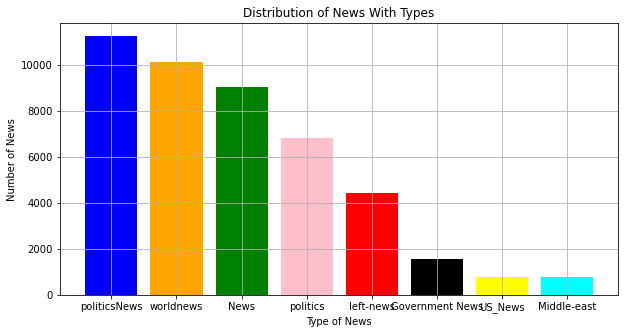

In [29]:
plot = plt.figure()
plt.bar(clean_news['subject'].value_counts().index,clean_news['subject'].value_counts().values, color = ['blue','orange','green','pink','red', 'black', 'yellow', 'cyan'])
plt.title('Distribution of News With Types')
plt.ylabel('Number of News')
plt.xlabel('Type of News')
plt.grid()
plt.show()

#### 👁‍🗨 Result Shows:
- The dataset has more political news.


#### Count of those subjects based on true or fake

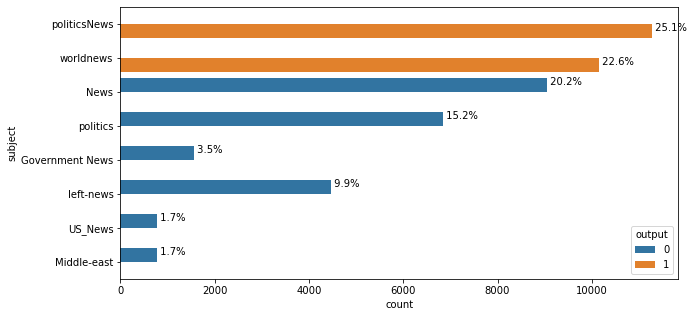

In [30]:
ax = sns.countplot(y='subject', hue='output', data=clean_news)

total = clean_news['subject'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

#### 👁‍  🗨Observstions from Resuls:

- There is no Fake news in politics and world news and True news counts more in politics than World News
- THIS looks that a highely biased dataset which may provide less accuracy to the model. 

#### Count of fake news and true news

In [31]:
raud = clean_news['output'].value_counts()
raud

0    23471
1    21417
Name: output, dtype: int64

#### 👁‍🗨 Ovserved from Result:

- We have abalanced data
- Fake news is higher than True news with small amount

### 7. Extracting new features from the news
#### Targets to find
- Polarity(signifies the sentiment of the news)
- Review length(Length of the news by counting number of letters and spaces)
- Word Count(Number of words in the news)

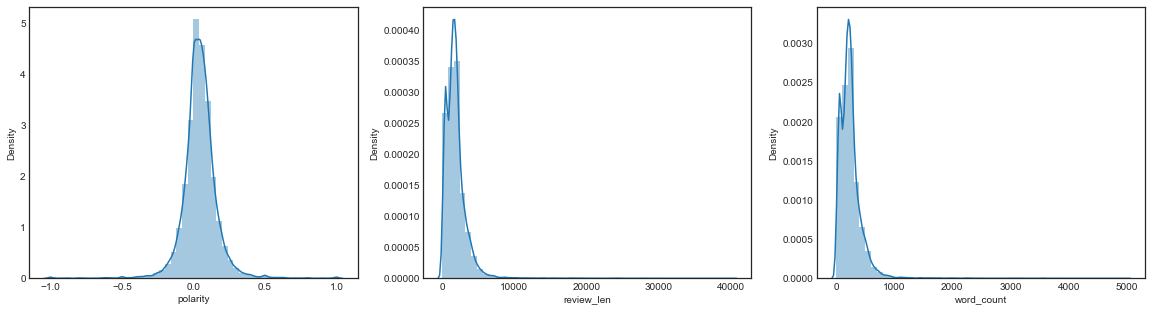

In [32]:
#Extracting the features from the news
clean_news['polarity'] = clean_news['news'].map(lambda text: TextBlob(text).sentiment.polarity)
clean_news['review_len'] = clean_news['news'].astype(str).apply(len)
clean_news['word_count'] = clean_news['news'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(clean_news['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(clean_news['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(clean_news['word_count'])
fig = plt.gcf()


#### 👁‍  Observstions from Resuls:

- Most of the polarity are neutral, neither bad nor happy news.
- The word count is shows between 0-1000. 
- The length of the news are between 0-5000 and some news has upto 10000 words.

### 7.1. N-gram Analysis Test
- Looking for Top 30 words in News
- Get some idea from thos news by looking top 30  words.

In [33]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['news'], 30)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df1.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 30 words in news')

trump 148219
said 133030
president 57308
would 55660
people 42426
one 38587
state 35506
new 32270
also 31394
obama 31305
clinton 30392
reuters 29561
house 29415
government 28595
donald 28375
states 27076
republican 26589
year 25380
white 24421
could 24418
the 23883
told 23564
united 23551
like 23165
campaign 22423
two 22237
election 22075
time 21647
news 21586
it 21559


#### 👁‍  Observstions from Resuls:

- All the top 30 news are about the government
- Word "trump" is the highest in the news cases.(was the issue in the news)
- In the case of news agencies Reuters gets the highest count.
- Election and Election campaigns are also major issues on the news case.
- Most of the News seems about US poletics and it is between repeblican and democats presidency.

### Let's See Co-occurring words using bigrams

In [35]:
#Function to get top bigram words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_bigram(clean_news['news'], 30)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)
    
#Creating the dataframe of word and frequency
df3 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df3.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 30 bigrams in news')


donald trump 26585
united states 18910
white house 15998
hillary clinton 10115
new york 8552
featured image 7693
north korea 7248
president donald 6976
twitter com 6567
image via 6326
pic twitter 6148
barack obama 5760
year old 5113
president trump 5008
trump said 4938
prime minister 4815
last year 4746
last week 4725
supreme court 4670
said statement 4534
fox news 4399
president obama 4384
islamic state 4198
secretary state 4038
getty images 4022
national security 3977
president barack 3902
trump administration 3885
said would 3714
told reuters 3554


#### 👁‍  Observstion from Resuls:

- As feared, I think the model will be biased in its results considering the amount of trump news
- We can see the North Korea news as well, I think it will be about the dispute between the US and NK
- There is also some news from fox news as well

### Let's See Co-occurring words using trigram

In [122]:
#Function to get top trigram words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_trigram(clean_news['news'], 30)

#Printing word and their respective frequencies
for word, freq in common_words:
    print(word, freq)

#Creating a dataframe with words and count
df6 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Grouping the words and plotting their frequencies
df6.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 30 trigrams in news')


president donald trump 6908
pic twitter com 6148
president barack obama 3895
new york times 2151
donald trump realdonaldtrump 1790
reuters president donald 1564
black lives matter 1514
21st century wire 1474
president united states 1198
elect donald trump 1153
president elect donald 1108
white house said 1056
new york city 1050
president vladimir putin 982
news 21st century 949
national security adviser 919
affordable care act 909
director james comey 890
speaker paul ryan 863
fbi director james 820
state rex tillerson 778
member 21wire tv 775
secretary state rex 769
featured image video 758
russian president vladimir 756
donald trump said 747
republican presidential candidate 742
century wire says 733
video screen capture 727
leader mitch mcconnell 723


#### 👁‍  Observstion from Resuls:

- There is important news that ruled the US media-’Black lives matter’ post the demise of Floyd. We can see that news has been covered in our data. There was a lot of fake news revolved around death.
- The rest of the news is about US politics

### WordCloud of Fake and True News

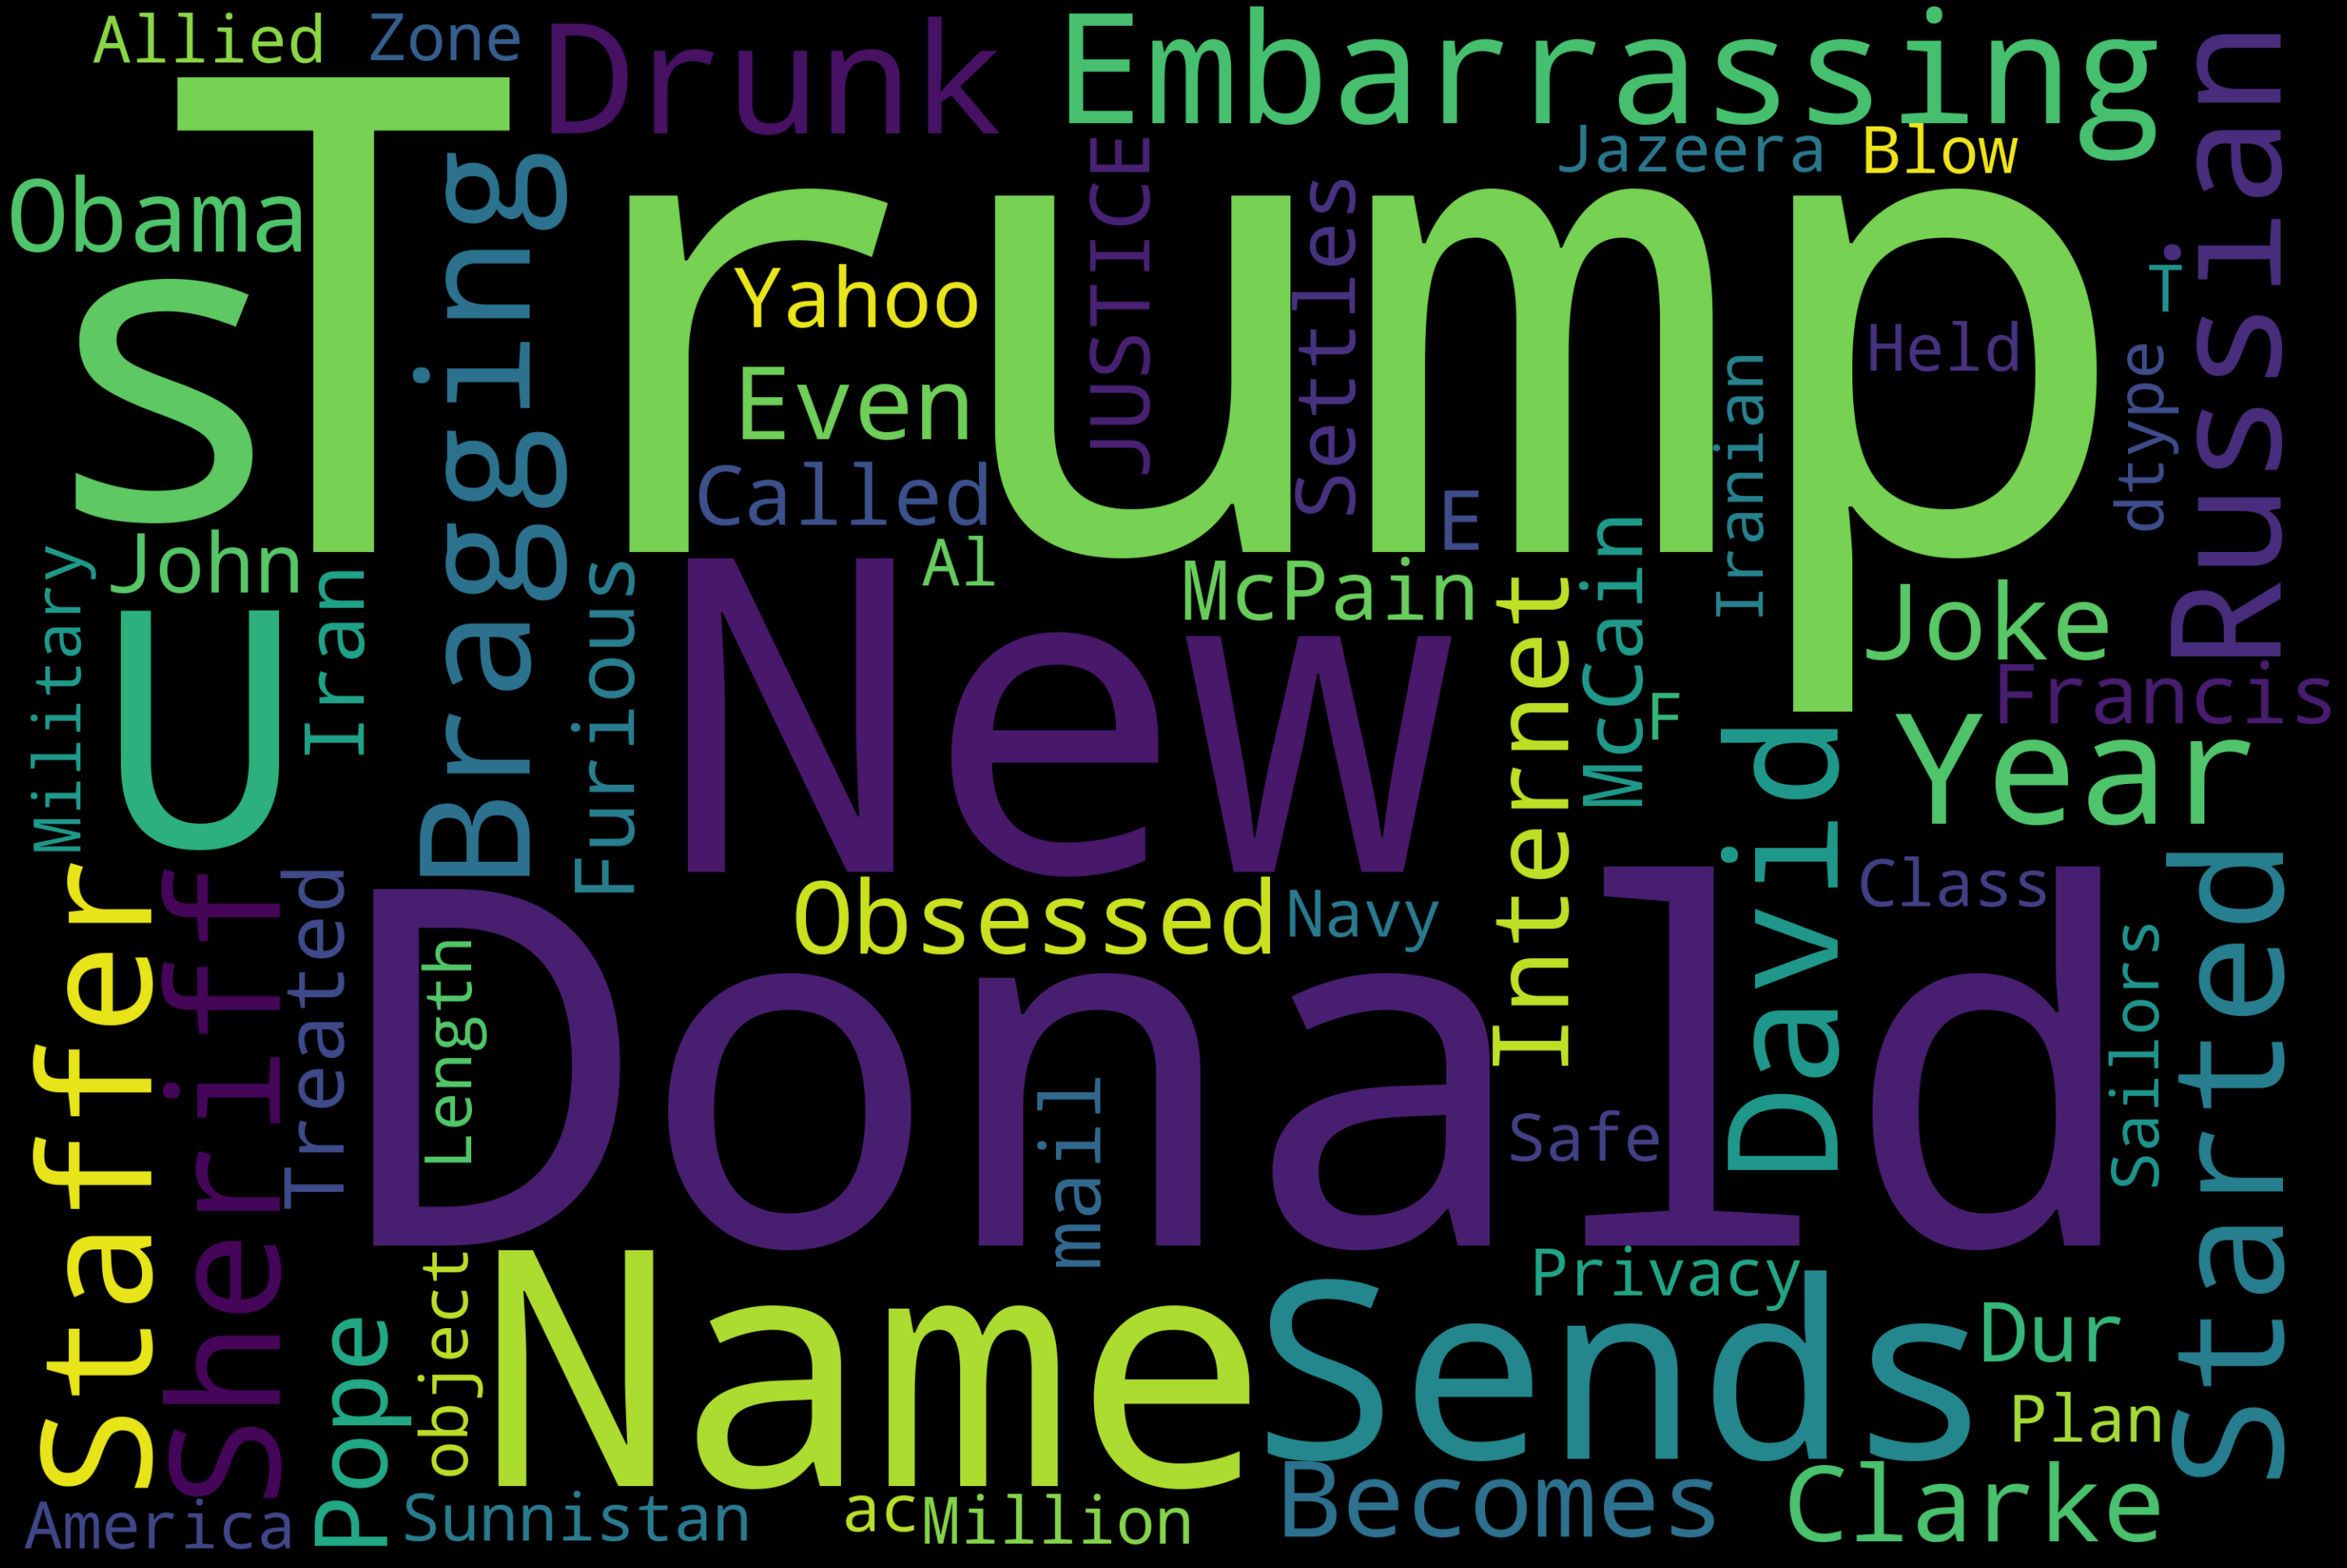

In [36]:
text = fake_news_data["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

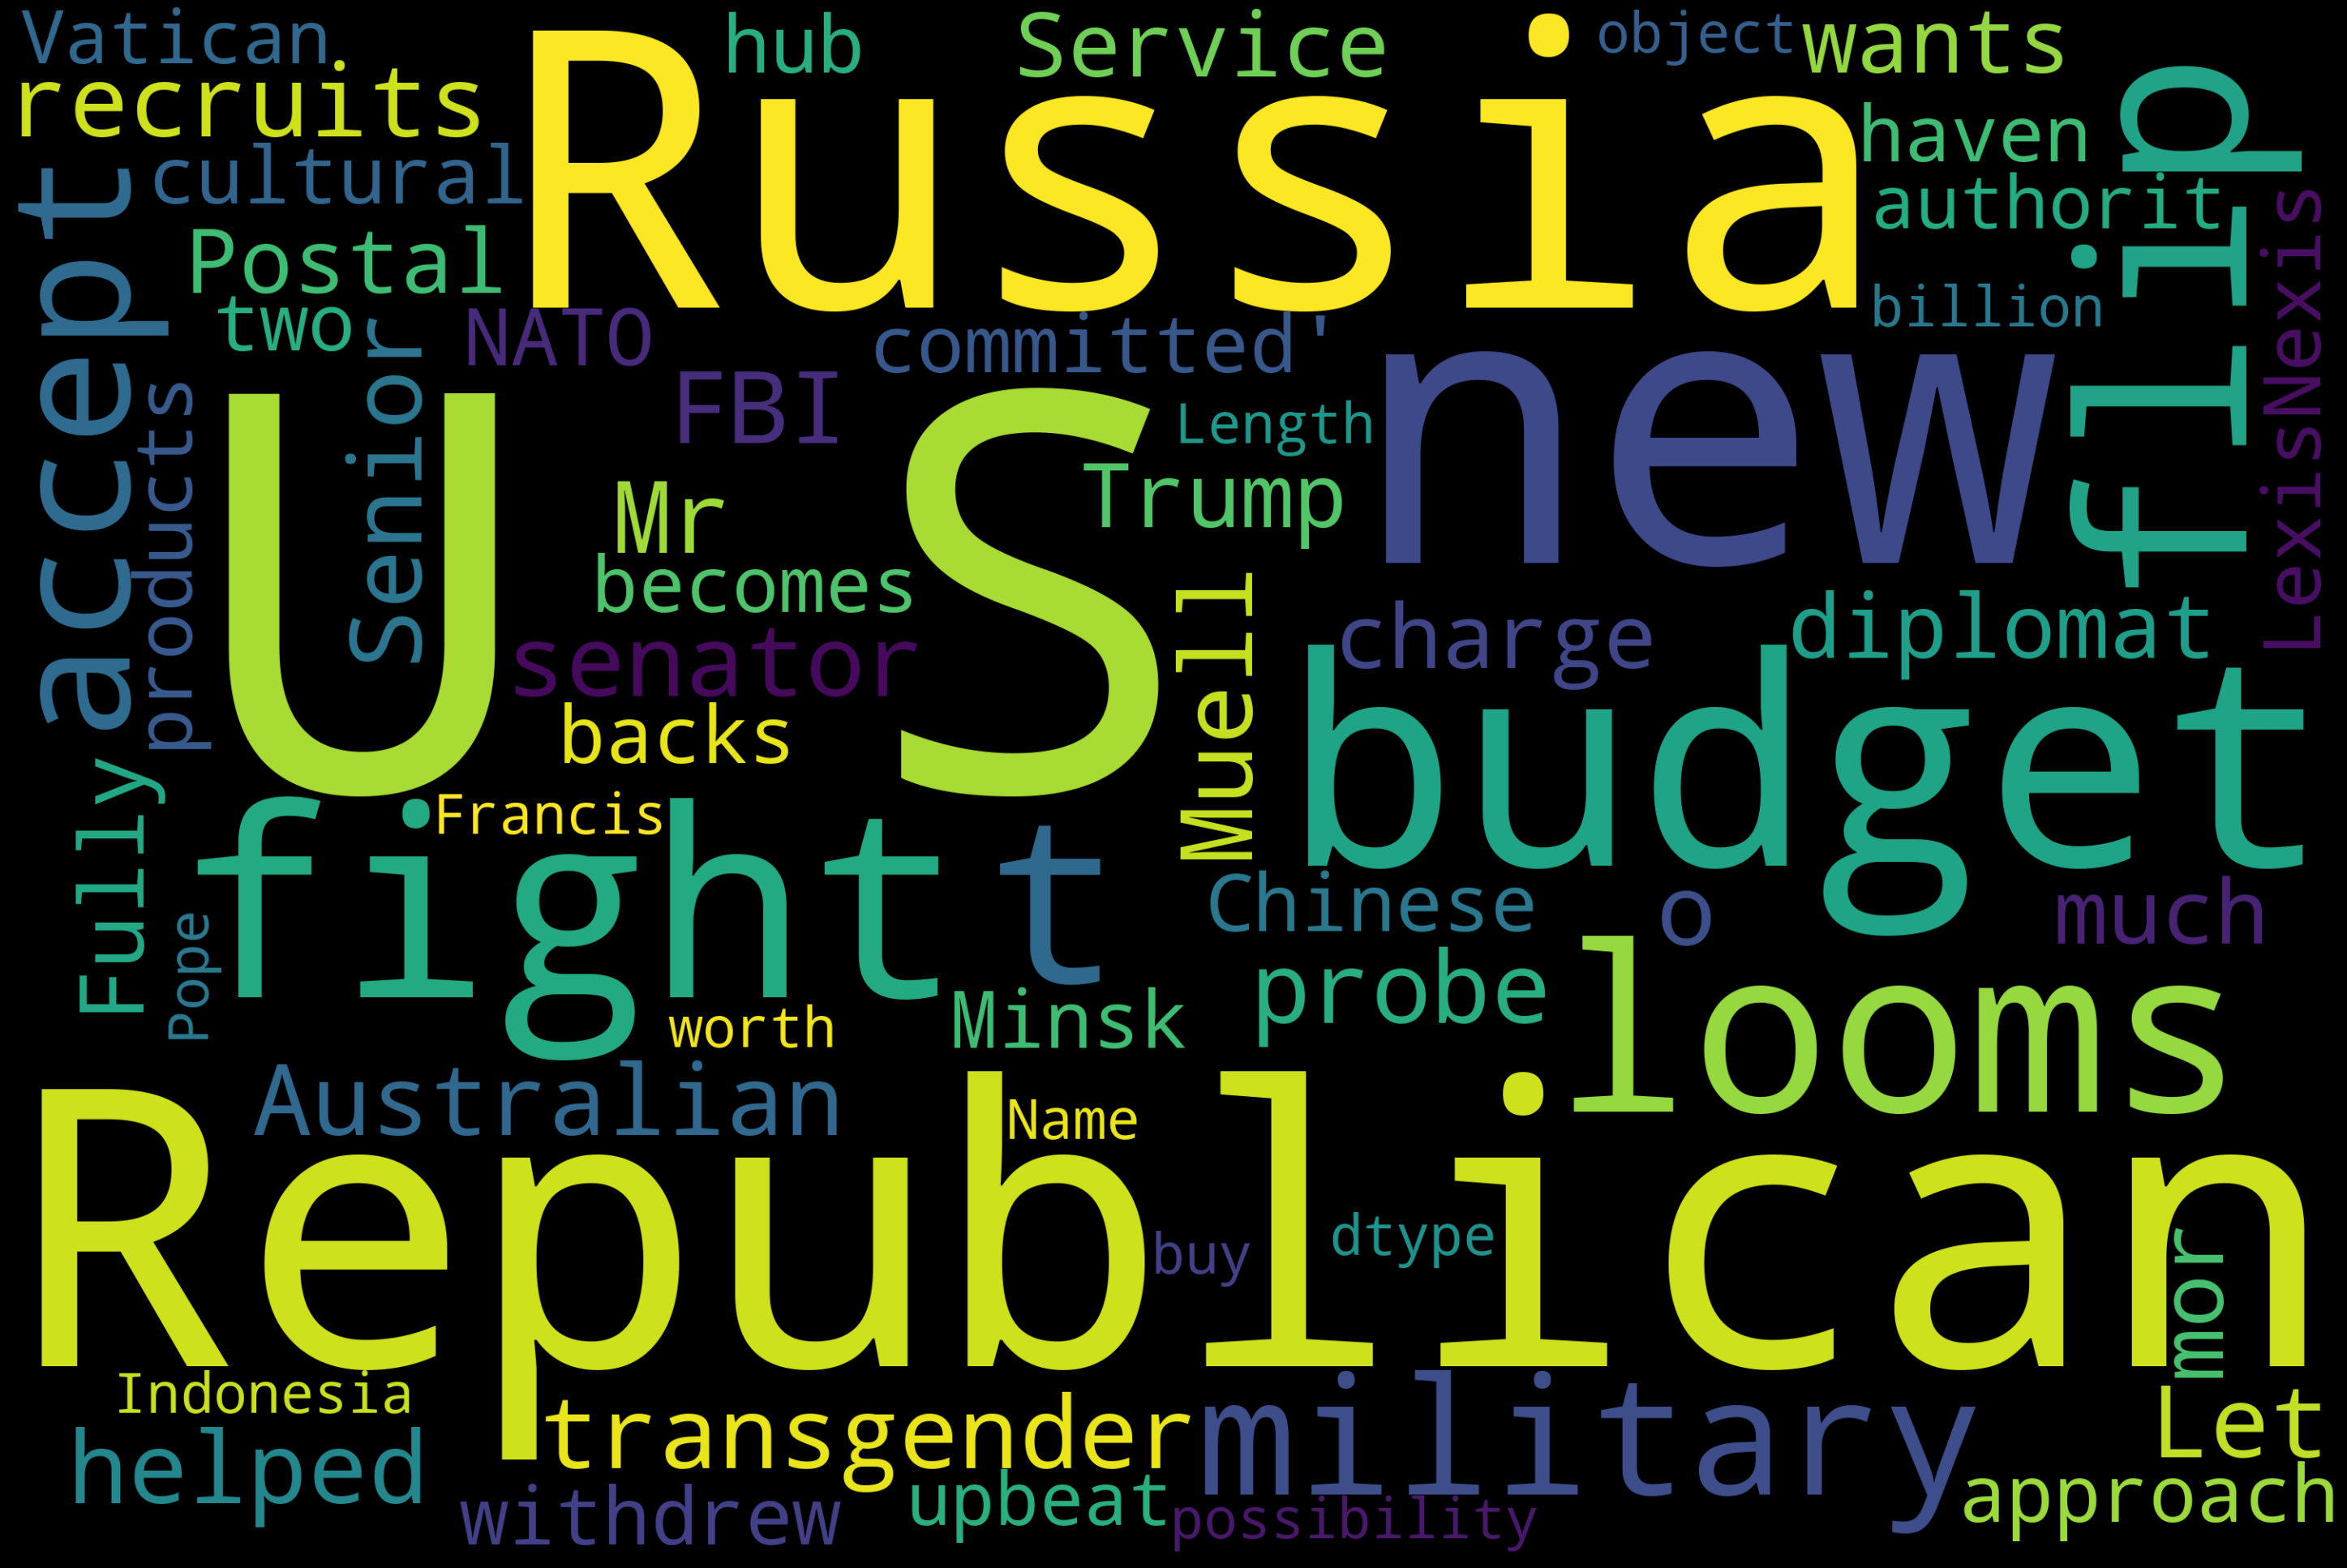

In [37]:
text = true_news_data["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### NB- The size of the word in the word cloud is proportional to the frequency of the word inside the corpus.
- Additionally from the WordCloud we can observe that there is no stop words or unecessary charaters in it.
- => True news doesn’t involve much trump instead on Republican Party and Russia
- => There are news about Budget, military which comes under government news

### 8. News vs Time - Time series analysis- Fake/True news

- Help us to understand the connection of news types to the time they broadcast. 

In [38]:
#Creating the count of output based on date
fake=fake_news_data.groupby(['date'])['output'].count()
fake=pd.DataFrame(fake)

true=true_news_data.groupby(['date'])['output'].count()
true=pd.DataFrame(true)

#Plotting the time series graph
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=true.index,
         y=true['output'],
         name='True',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=fake.index,
         y=fake['output'],
         name='Fake',
    line=dict(color='red'),
    opacity=0.8))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
        
    
fig.update_layout(title_text='True and Fake News',plot_bgcolor='rgb(248, 248, 255)',yaxis_title='Value')

fig.show()

#### 👁‍  Observstion from Resuls:

- There was no sign of True News unitl 2016 and afet 2013 There was More True News than that of Fake news.
- Few outliers in true news where recorded between Nov 9, 2016 and Apr 7, 2017. 
- Our dataset has more fake news than the true one, It can be good for fake news classification.

### Stemming & Vectorizing
### Stemming
- Stemming is the technique or method of reducing words with similar meaning into their “stem” or “root” form.
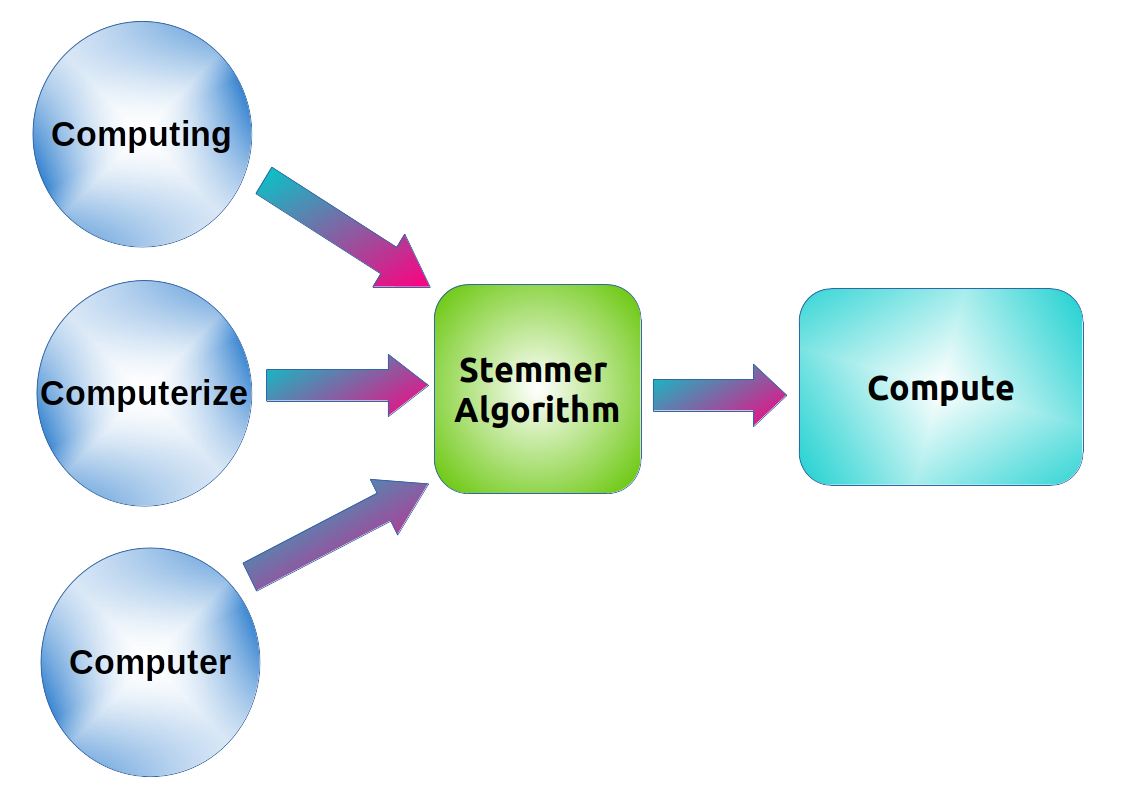
- .Processes in Stemming

In [39]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.head()

,news
0,"u.s. budget fight looms, republicans flip fisc..."
1,u.s. military accept transgender recruits mond...
2,senior u.s. republican senator: 'let mr. muell...
3,fbi russia probe helped australian diplomat ti...
4,trump wants postal service charge 'much more' ...


In [40]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news) 

In [41]:
corpus[1]

'u militari accept transgend recruit monday pentagonwashington reuter transgend peopl allow first time enlist u militari start monday order feder court pentagon said friday presid donald trump administr decid appeal rule block transgend ban two feder appeal court one washington one virginia last week reject administr request put hold order lower court judg requir militari begin accept transgend recruit jan justic depart offici said administr challeng rule depart defens announc releas independ studi issu come week rather litig interim appeal occur administr decid wait dod studi continu defend presid law author district court meantim offici said speak condit anonym septemb pentagon said creat panel senior offici studi implement direct trump prohibit transgend individu serv defens depart feb submit plan trump lawyer repres current serv transgend servic member aspir recruit said expect administr appeal rule conserv major suprem court hope would happen pentagon spokeswoman heather babb said

### TFIDF(Term Frequency — Inverse Document Frequency)
- A technique to quantify a word in documents, by computing a weight to each word which signifies the importance of the word in the document and corpus.

- Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the news.

In [42]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape

(44888, 5000)

As we have considered 5000 words, we can confirm that we have 5000 columns from the shape.

In [43]:
#Getting the target variable
y=clean_news['output']

### Checking for balance of data
We should be careful about when handling imbalance data. If it is imbalanced, the model will be biased towards the higher frequency class and returns max output

In [44]:
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({0: 23471, 1: 21417})


The dataset looks balanced one

### Split the data set to Train and Test with 1/4 ratio(75-Tarin, 25-Test)
- Using train test split function.

In [45]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Model Building: Fake News Classifier¶


In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Model Selection
- First select the best peforming model by using cross validaton.

In [47]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))


Logistic Regression Test Accuracy: 0.9719298243001611
Decision Tree Test Accuracy: 0.9486266488612092
KNN Test Accuracy: 0.6222399406511222
Naive Bayes Test Accuracy: 0.9481154418267034


#### 👁‍  Observstion from Resuls:
- Logistic regression outdone the rest of the algorithms followed by Naive Bayes and Decision Tree.That's great. So we choose logistic regressionand tune hyperparameters.

### Logistic Regression with Hyperparameter Tuning
- We use regularization parameter and penality for parameter tuning.

In [48]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=11.513953993264458, random_state=0)
The mean accuracy of the model is: 0.9845838531456068


- From the selected parameters, we get the accuracy.

In [148]:
logreg = LogisticRegression(C=24.420530945486497, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


- We have got 98% accuracy. 
- As already discussed before the dataset is a a littlebit biased so we can easily get such higher accuracy without any effort in processing it. 
- But for classification problems we need to get confusion matrix and check f1 score rather than accuracy

### Confusion Matrix
#### - true positive and true negative classified by the mode-

In [49]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','True'])

NameError: name 'y_pred' is not defined

- Check out the diagonal elements(5785+5268), they are correctly predicted records and rest are incorrectly classified by the algorithm. 
- Our model has done well(results are good by the data is biased :P)

### Classification Report
- Considering Fake news, we should seriously consider precision score (False positive). 
- We can't afford the mistakes when the model classifies fake news as true which will lead to chaos

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

#### - All our scores are has 98% f1-score

### ROC-AUC Curve¶
This is a very important curve where we decide on which threshold to setup based upon the objective criteria

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

We should consider the AUC score here which is 98%. Very well. All metrics are performing good. The more far left the curve is better our model We can adjust our threshold based on our ROC curve to get results based on model requirements


### Deep learning-LSTM
Here in this part we use neural network to predict whether the given news is fake or not.

We aren't gonna use normal neural network like ANN to clasify but LSTM(long short term memory) which helps in containing sequence information.Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more.

#### One hot for Embedding layers¶
Before jumping into creating a layer let's take some vocabulary size. There might be a question why vocabulary size ? it is because we will be one hot encoding the sentences in the corpus for embedding layers. While onehot encoding the words in sentences will take the index from the vocabulary size. Let's fix the vocabulary size to 10000

In [50]:
corpus[1]

'u militari accept transgend recruit monday pentagonwashington reuter transgend peopl allow first time enlist u militari start monday order feder court pentagon said friday presid donald trump administr decid appeal rule block transgend ban two feder appeal court one washington one virginia last week reject administr request put hold order lower court judg requir militari begin accept transgend recruit jan justic depart offici said administr challeng rule depart defens announc releas independ studi issu come week rather litig interim appeal occur administr decid wait dod studi continu defend presid law author district court meantim offici said speak condit anonym septemb pentagon said creat panel senior offici studi implement direct trump prohibit transgend individu serv defens depart feb submit plan trump lawyer repres current serv transgend servic member aspir recruit said expect administr appeal rule conserv major suprem court hope would happen pentagon spokeswoman heather babb said

We can see all the words in the sentences are transformed into their index from the vocabulary we created.

### Padding embedded documents
All the neural networks require to have inputs that have the same shape and size. However, when we pre-process and use the texts as inputs for our LSTM model, not all the sentences have the same length. In other words, naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, this is where the padding is necessary. Here we take the common length as 5000 and perform padding using pad_sequence() function . Also we are going to 'pre' pad so that zeros are added before the sentences to make the sentence of equal length

In [51]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [52]:
#Setting sentence length
sent_length=5000

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 9954 8619 3441]
 [   0    0    0 ... 2105 6343 7257]
 [   0    0    0 ... 1098 5139 1297]
 ...
 [   0    0    0 ... 4911 4102 1879]
 [   0    0    0 ... 4911 5726 6180]
 [   0    0    0 ... 4911  424 1879]]


In [53]:
embedded_docs[1]

array([   0,    0,    0, ..., 2105, 6343, 7257])

#### We can see all the sentences are of equal length with the addition of zeros infront of the sentences and making all the sentences of length 5000

### LSTM Model
At first we are going to develop the base model and compile it. The first layer will be the embedding layer which has the input of vocabulary size, vector features and sentence length. Later we add 30% dropout layer to prevent overfitting and the LSTM layer which has 100 neurons in the layer.In final layer we use sigmoid activation function. Later we compile the model using adam optimizer and binary cross entropy as loss function since we have only two outputs.

To understand how LSTM works please check this link. To give a small overview on how LSTM works,it remembers only the important sequence of words and forgets the insignificant words which doesn't add value in the prediction

In [54]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 40)          400000    
                                                                 
 dropout (Dropout)           (None, 5000, 40)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [55]:
len(embedded_docs),y.shape

(44888, (44888,))

### Fitting the LSTM Model
Before fitting to the model, let's consider the padded embedded object as X and y as y itself and convert them into an array.

In [56]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((44888, 5000), (44888,))

Let's split our new X and y variable into train and test and proceed with fitting the model to the data. We have considered 10 epochs and 64 as batch size. It can be varied to get better results.

In [57]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Fitting with 10 epochs and 64 batch size
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
470/470 [==============================] - 47472s 100s/step - loss: 0.1524 - accuracy: 0.9441 - val_loss: 0.0390 - val_accuracy: 0.9890
Epoch 2/10
470/470 [==============================] - 87631s 187s/step - loss: 0.0444 - accuracy: 0.9872 - val_loss: 0.0426 - val_accuracy: 0.9861
Epoch 3/10
218/470 [============>.................] - ETA: 5:45:49 - loss: 0.0384 - accuracy: 0.9873

KeyboardInterrupt: 

### Evaluation of model
Now, let's predict the output for our test data and evaluate the predicted values with y_test

In [ ]:
# Predicting from test data
y_pred=model.predict_classes(X_test)

#Creating confusion matrix
#confusion_matrix(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,classes=['Fake','True'])

In [ ]:
#Checking for accuracy
accuracy_score(y_test,y_pred)

In [ ]:
# Creating classification report 
print(classification_report(y_test,y_pred))

From the classification report we can see the accuracy value is nearly around 96%. We have to concentrate on precision score and it is 96% which is great.

### Bidirectional LSTM
Bi-LSTM is an extension of normal LSTM with two independent RNN's together. The normal LSTM is uni directional where it cannot know the future words whereas in Bi-LSTM we can predict the future use of words as there is a backward information passed on from the other RNN layer in reverse.

There is only one change made in the code compared to the LSTM, here we use Bidirectional() function and call LSTM inside.

In [ ]:
# Creating bidirectional lstm model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100))) # Bidirectional LSTM layer
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

### Fitting and Evaluation of Model
Let's now fit the bidirectional LSTM model to the data we have with the same parameters we had before

In [ ]:
# Fitting the model
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

In [ ]:
# Predicting from test dataset
y_pred1=model1.predict_classes(X_test)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm,classes=['Fake','True'])

In [ ]:
#Calculating Accuracy score
accuracy_score(y_test,y_pred1)

We have got an accuracy of 98%. That's better than LSTM !

In [ ]:
# Creating classification report 
print(classification_report(y_test,y_pred1))

From the classification report we can see the accuracy value is nearly around 98%. We have to concentrate on precision score and it is 98%

### Conclusion
- I tried somuch on processing the data and building the model. 
- We could have indulged in changing the ngrams while vectorizing the text data . We took 2 words and vectorized it. 

- Most of the fake news are surrounded among Election news and about Trump. 
- Considering the US elections 2020. There are chances to spread fake news and application of these technology will be heavily required.
- Fake news are currently rooted during this pandemic situation to play politics and to scare people and force them to buy goods
- Most of the news are from Reuters. We don't know whether this news media is politically influenced. So we should always consider the source of news to find if the news is fake or true.